# Logistic Regression from Scratch Using NumPy
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib, Scikit-Learn, TeX, Jupyter Notebook

**Discipline(s):** Machine Learning

**Keywords:** `machine-learning`, `classification`, `logistic-regression`


This notebook proivdes an implementation of binary classification with logistic regression built from scratch using *NumPy*.

## 1. Import Statements

---



In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## 2. Random Data Generation

---



Here, we generate random data to be used in this logistic regression implementation.

### 2.1. Generate Random Data

First, we specify the parameters used in our random data generation function.

In [2]:
weight = 20
bias = 10
mu = 20
sigma = 6
m = 1000

The data for implementing logistic regression is then generated randomly with two features, $x_1$ and $x_2$. This function returns a `data` array of shape $(m, 2)$ and a `labels` array of shape $(m, 1)$.

The data is generated as follows:

*   Feature $x_1$: Chosen uniformly at random in the interval $[0, 1)$.
*   Feature $x_2$: Chosen with the formula $x_2 = w * x_1 + b + -1^c * n$, where the "noise" `n` is chosen according to the normal distribution with mean $\mu$ and standard deviation $\sigma$.
*   Class Labels: Choose $c = 0$ with probability $1 / 2$ or $c = 1$ with probability $1 / 2$.

In [3]:
def get_random_data(w, b, mu, sigma, m):

  data = np.empty([m, 2])
  labels = np.empty([m, 1], dtype=int)

  for i in range(m):

    # Choose either 0 or 1 for the label.
    labels[i] = np.random.choice([0, 1], p=[0.5, 0.5])

    # Set the first feature.
    data[i, 0] = np.random.default_rng().uniform(0, 1)

    # Set the second feature.
    n = np.random.default_rng().normal(mu, sigma)
    data[i, 1] = w * data[i, 0] + b + (-1) ** labels[i] * n

  return data, labels

In [4]:
data, labels = get_random_data(weight, bias, mu, sigma, m)

### 2.2. Display the Random Data

Then, we use *Matplotlib* to display the data generated by our function.

In [5]:
def display_random_data(data, labels):

  classes = ['1', '0']
  colors = ['red', 'blue']

  # Generate the scatter plot.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
  
  # Format the title and axis labels.
  plt.title('Randomly-Generated Data', fontsize=14)
  plt.xlabel('$ x_1 $', fontsize=14)
  plt.ylabel('$ x_2 $', fontsize=14)

  # Include a legend.
  plt.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=8)

  plt.show()

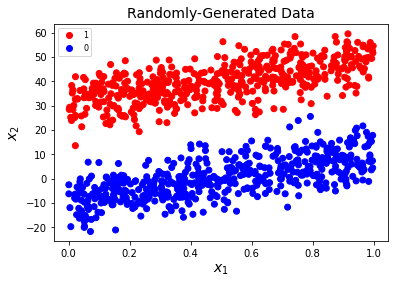

In [6]:
display_random_data(data, labels)

### 2.3. Split the Data into Training and Test Sets

Finally, we take the randomly-generated data and split it into training and test sets. Here, we use 80% of our data for training, and the remaining 20% for testing.

In [7]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, train_size=0.8)

## 3. Logistic Regression from Scratch Using NumPy

---



Here, we present an implementation of logistic regression solely using *NumPy*. The model is built, trained, and displayed. In addition, the *sigmoid* and *binary cross-entropy loss* functions are used.

### 3.1. Define the Sigmoid function.

The *sigmoid* function can be defined as: $\sigma(z) = \frac{1}{1 + e^{-z}}$.

In [8]:
def sigmoid(z):
  
  return 1 / (1 + np.exp(-z))

### 3.2. Define the Binary Cross-Entropy Loss Function

Further, the binary cross-entropy loss function can be defined as:

$\mathcal{L}_\mathrm{ce} = - y \log a - (1-y) \log(1-a)$

In [9]:
def binary_cross_entropy_loss(y, a):

  return -(y * np.log(a) + (1 - y) * np.log(1 - a)).mean()

### 3.3. Build and Train the Model

After defining the functions, we can train the model using *NumPy*.

In [10]:
def train_model(data_train, labels_train):

  print("Training Model Using NumPy\n")

  # Set up all the values.
  w = np.zeros((2, 1))
  b = np.zeros((1, 1))
  learning_rate = 0.01
  num_epochs = 75000
  n = len(labels_train)

  for epoch in range(num_epochs):

    # Get the data for the model.
    z = np.matmul(data_train, w) + b
    a = sigmoid(z)
    loss = binary_cross_entropy_loss(labels_train, a)
    
    # Print the statistics
    if epoch % 1000 == 0:
      print("Epoch ", epoch, "/", num_epochs, ": Loss = ", loss, sep="")

    # Calculate the derivatives.
    dz = a - labels_train
    dw = 1/n * np.matmul(data_train.T, dz)
    db = 1/n * np.sum(dz)

    # Implement gradient descent.
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)

  return w, b, loss, z

In [11]:
w, b, loss, z = train_model(data_train, labels_train)

Training Model Using NumPy

Epoch 0/75000: Loss = 0.6931471805599452
Epoch 1000/75000: Loss = 0.1382753454641098
Epoch 2000/75000: Loss = 0.08607662778545556
Epoch 3000/75000: Loss = 0.06463160745225888
Epoch 4000/75000: Loss = 0.052836179011712156
Epoch 5000/75000: Loss = 0.0453047482986712
Epoch 6000/75000: Loss = 0.040041447953765345
Epoch 7000/75000: Loss = 0.036133977839609324
Epoch 8000/75000: Loss = 0.03310479404888607
Epoch 9000/75000: Loss = 0.030678963050206346
Epoch 10000/75000: Loss = 0.02868661005088045
Epoch 11000/75000: Loss = 0.027016884461896366
Epoch 12000/75000: Loss = 0.025594237921202828
Epoch 13000/75000: Loss = 0.024365324035220896
Epoch 14000/75000: Loss = 0.0232913475048697
Epoch 15000/75000: Loss = 0.02234338445534423
Epoch 16000/75000: Loss = 0.02149940672923335
Epoch 17000/75000: Loss = 0.02074232597242194
Epoch 18000/75000: Loss = 0.0200586707432925
Epoch 19000/75000: Loss = 0.019437669186017727
Epoch 20000/75000: Loss = 0.018870598826861717
Epoch 21000/750

### 3.4. Get the Weights and the Bias

Next, we can extract the weights $w_1$, $w_2$ and the bias $b$ from the arrays.

In [12]:
w1 = w[0]
w2 = w[1]
b = b[0]

print(w1, w2, b)

[4.90397493] [-0.39089821] [5.43088635]


### 3.5. Compute the Binary Cross-Entropy Loss

Since the loss is calculated as we train the model, the overall loss can be easily extracted.

In [13]:
print("Binary Cross-Entropy Loss:", loss)

Binary Cross-Entropy Loss: 0.009429511454031946


### 3.6. Make Predictions Using the Model

Now that the model is trained, we can make predictions.

In [14]:
predictions = []

for i in sigmoid(z):
  if i >= 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

print(predictions)

[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 

### 3.7. Compute the Accuracy of the Model

We can now analyze the accuracy of the model by looking at the predictions and the test set.

In [15]:
from sklearn.metrics import f1_score
print("Accuracy:", f1_score(predictions, labels_train))

Accuracy: 0.9963008631319359


### 3.8. Display the Data with the Trained Model

We can now compute a new separating line and plot it with the original data. Once again, to obtain the new separating line, we use the function `get_separating_line()`, which sets $w_1x_1 + w_2x_2 + b = 0$. From there, it simply solves for $x_2$ to get the sepatating line when the sigmoid function is $1/2$.

In [16]:
def get_separating_line(w1, w2, b):

  return -(w1 * 0.5 + b) / w2

In [17]:
def display_model_data(data, labels):

  classes = ['0', '1']
  colors = ['red', 'blue']

  # Generate the scatter plot.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
  
  # Format the title and axis labels
  plt.title('Trained Model with NumPy', fontsize=14)
  plt.xlabel('$ x_1 $', fontsize=14)
  plt.ylabel('$ x_2 $', fontsize=14)

  # Inlcude a legend.
  plt.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=8)

  # Plot the true line used to generate the data.
  x = np.linspace(0,1,100)
  y = weight * x + bias
  plt.plot(x, y)

  # Plot the separating line of the trained model
  separating_line = get_separating_line(w1, w2, b)
  print(separating_line)
  y = separating_line * x + b
  plt.plot(x, y)

  plt.show()

[20.16605235]


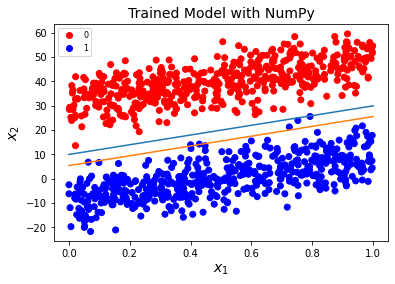

In [18]:
display_model_data(data, labels)

### 3.9. Generate a Heatmap for the Trained Model

Finally, we visualize the model with a heatmap.

In [19]:
def sigmoid(x):
  
  return 1 / (1 + np.exp(-x))

In [20]:
def display_heatmap(w1, w2, b):

  # Get the data for the heatmap.
  x1, x2 = np.meshgrid(np.linspace(0, 1, 200), np.linspace(-20, 60, 200))
  z = sigmoid(w1 * x1 + w2 * x2 + b)

  # Set the bounds for z.
  z = z[:-1, :-1]
  z_min, z_max = -np.abs(z).max(), np.abs(z).max()

  # Generate the heatmap.
  fig, ax = plt.subplots()
  c = ax.pcolormesh(x1, x2, z, cmap='RdBu', vmin=0, vmax=1)
  ax.set_title('Trained Model with NumPy', fontsize=14)
  fig.colorbar(c, ax=ax)
  plt.xlabel('$ x_1 $', fontsize=14)
  plt.ylabel('$ x_2 $', fontsize=14)
  
  # Set the limits of the plot.
  ax.axis([x1.min(), x1.max(), x2.min(), x2.max()])

  plt.show()

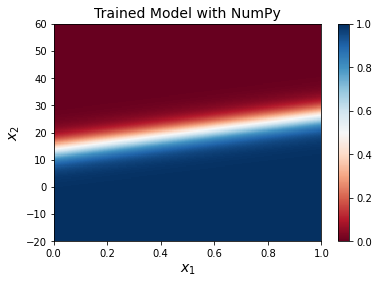

In [21]:
display_heatmap(w1, w2, b)